APRENDIZAJE NO SUPERVISADO

CLUSTERING DE NASHVILLE HOUSING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [35]:
data = pd.read_csv('Nashville Housing.csv')
data

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,20150608-0053286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,20150304-0019013,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,20160819-0087214,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE","September 7, 2016",93844,20160919-0098411,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data=data.drop(["ParcelID","SoldAsVacant", "LandUse","PropertyAddress","SaleDate","LegalReference","OwnerName","OwnerAddress","TaxDistrict","Bedrooms","FullBath","HalfBath"], axis=1)
data

,UniqueID,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt
0,2045,240000,2.3,50000.0,168200.0,235700.0,1986.0
1,16918,366000,3.5,50000.0,264100.0,319000.0,1998.0
2,54582,435000,2.9,50000.0,216200.0,298000.0,1987.0
3,43070,255000,2.6,50000.0,147300.0,197300.0,1985.0
4,22714,278000,2.0,50000.0,152300.0,202300.0,1984.0
...,...,...,...,...,...,...,...
56472,30469,157500,NaN,NaN,NaN,NaN,NaN
56473,27707,145000,NaN,NaN,NaN,NaN,NaN
56474,52709,234611,NaN,NaN,NaN,NaN,NaN
56475,54042,93844,NaN,NaN,NaN,NaN,NaN


In [37]:
#data["SoldAsVacant"] = data["SoldAsVacant"].map(
#    {"No": "0","Yes": "1","N": "0", "Y": "1"},
    #na_action=None,
#)
#data['SoldAsVacant'] = data['SoldAsVacant'].astype(float) # convierto la columna SoldAsVacant en entero
#data["SoldAsVacant"].value_counts()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UniqueID       56477 non-null  int64  
 1   SalePrice      56477 non-null  object 
 2   Acreage        26015 non-null  float64
 3   LandValue      26015 non-null  float64
 4   BuildingValue  26015 non-null  float64
 5   TotalValue     26015 non-null  float64
 6   YearBuilt      24163 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ MB


In [39]:
data['SalePrice'] = data['SalePrice'].str.replace('$','') #reemplazo el caracter $ por un espacio vacio
data['SalePrice'] = data['SalePrice'].str.strip() #elimino los espacios en blanco al pricipio y al final de cada valor
data['SalePrice'] = data['SalePrice'].str.replace(',', '', regex=False).astype(float) #reemplaza la , por espacio en blanco y convierte a flotante
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UniqueID       56477 non-null  int64  
 1   SalePrice      56477 non-null  float64
 2   Acreage        26015 non-null  float64
 3   LandValue      26015 non-null  float64
 4   BuildingValue  26015 non-null  float64
 5   TotalValue     26015 non-null  float64
 6   YearBuilt      24163 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.0 MB


In [40]:
data.describe()

,UniqueID,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt
count,56477.000000,5.647700e+04,26015.000000,2.601500e+04,2.601500e+04,2.601500e+04,24163.000000
mean,28334.001133,3.272264e+05,0.498923,6.906856e+04,1.607847e+05,2.323754e+05,1963.744899
std,16352.590651,9.298326e+05,1.570454,1.060401e+05,2.067999e+05,2.810643e+05,26.542982
min,0.000000,5.000000e+01,0.010000,1.000000e+02,0.000000e+00,1.000000e+02,1799.000000
25%,14186.000000,1.350000e+05,0.180000,2.100000e+04,7.590000e+04,1.028000e+05,1948.000000
50%,28313.000000,2.051000e+05,0.270000,2.880000e+04,1.114000e+05,1.485000e+05,1960.000000
75%,42513.000000,3.285000e+05,0.450000,6.000000e+04,1.807000e+05,2.683500e+05,1983.000000
max,56635.000000,5.427806e+07,160.060000,2.772000e+06,1.297180e+07,1.394040e+07,2017.000000


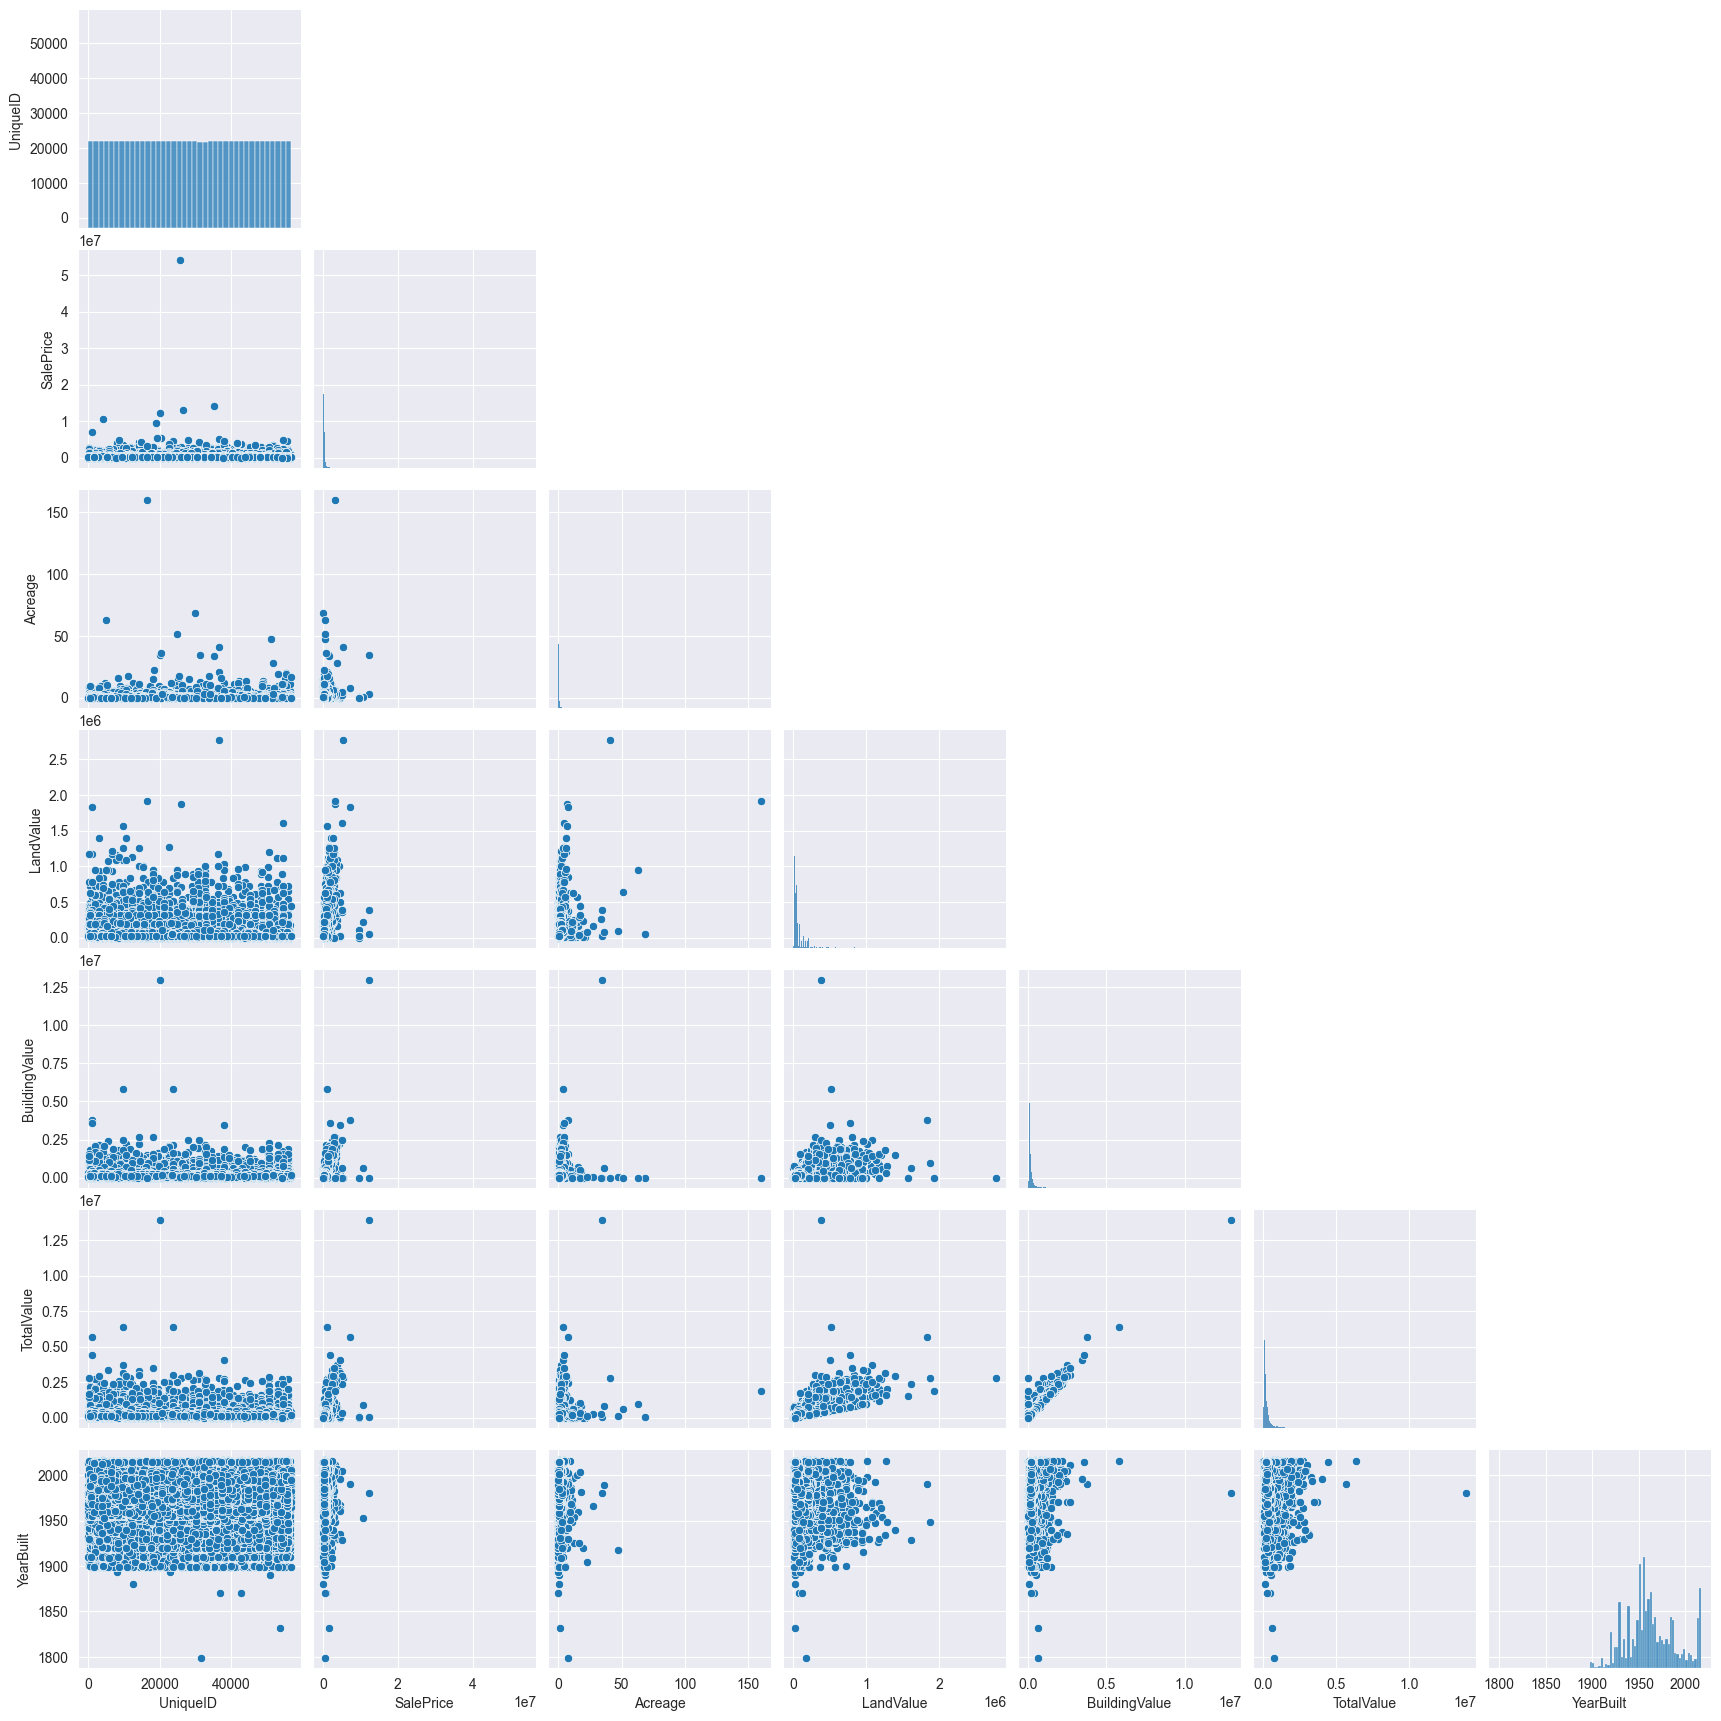

In [41]:
# Visualizacion de las distribuciones de a pares

sns.set_style("darkgrid")

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

pairplot = sns.pairplot(data)
pairplot.map_upper(hide_current_axis)
plt.show()